In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

file_path = "/Users/serena/Desktop/new_merged_data.csv"
new_merged_data = pd.read_csv(file_path)

# Convert 'date' column to datetime format
new_merged_data['date'] = pd.to_datetime(new_merged_data['date'])

# Set 'date' as the index
new_merged_data.set_index('date', inplace=True)

# Display dataset structure
print(new_merged_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2003-01-01 to 2023-09-01
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dom_pax             247 non-null    float64
 1   int_pax             247 non-null    float64
 2   pax                 247 non-null    float64
 3   dom_flt             247 non-null    float64
 4   int_flt             247 non-null    float64
 5   flt                 247 non-null    float64
 6   dom_rpm             247 non-null    float64
 7   int_rpm             247 non-null    float64
 8   rpm                 247 non-null    float64
 9   dom_asm             247 non-null    float64
 10  int_asm             247 non-null    float64
 11  asm                 247 non-null    float64
 12  dom_lf              247 non-null    float64
 13  int_lf              247 non-null    float64
 14  lf                  247 non-null    float64
 15  fuel_spot_price     247 non-null    fl

In [2]:
# Define training period (2003-2019 Pre-COVID)
train_end = "2019-12-01"
test_start = "2023-04-01"
test_end = "2023-09-01"

# Train/Test split for each target variable
train_data = new_merged_data.loc[:train_end]
test_data = new_merged_data.loc[test_start:test_end]

In [3]:
# Function to perform Augmented Dickey-Fuller (ADF) test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Test for {series.name}:")
    print(f"Test Statistic: {result[0]}")
    print(f"P-Value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] <= 0.05:
        print("✅ The series is stationary (Reject H0)")
    else:
        print("❌ The series is NOT stationary (Fail to Reject H0)")

# Run ADF test for all target variables
targets = ["pax", "flt", "lf", "rpm"]
for target in targets:
    adf_test(train_data[target])

ADF Test for pax:
Test Statistic: 0.27803256330335574
P-Value: 0.9763138792113957
Critical Values: {'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}
❌ The series is NOT stationary (Fail to Reject H0)
ADF Test for flt:
Test Statistic: -1.9028568116189495
P-Value: 0.3307183721799745
Critical Values: {'1%': -3.4652439354133255, '5%': -2.8768752281673717, '10%': -2.574944653739612}
❌ The series is NOT stationary (Fail to Reject H0)
ADF Test for lf:
Test Statistic: -2.0003118197012943
P-Value: 0.28643639383469494
Critical Values: {'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}
❌ The series is NOT stationary (Fail to Reject H0)
ADF Test for rpm:
Test Statistic: -0.146546617051721
P-Value: 0.9446003908862237
Critical Values: {'1%': -3.4652439354133255, '5%': -2.8768752281673717, '10%': -2.574944653739612}
❌ The series is NOT stationary (Fail to Reject H0)


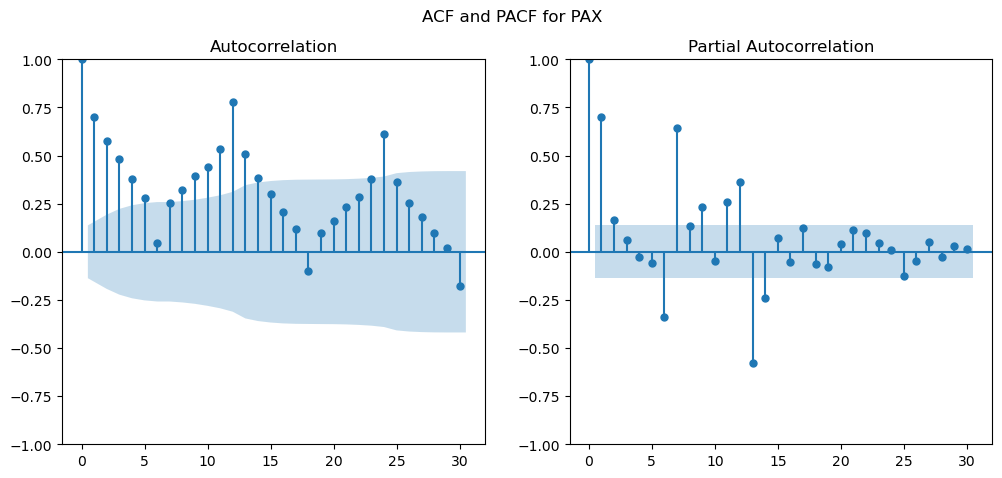

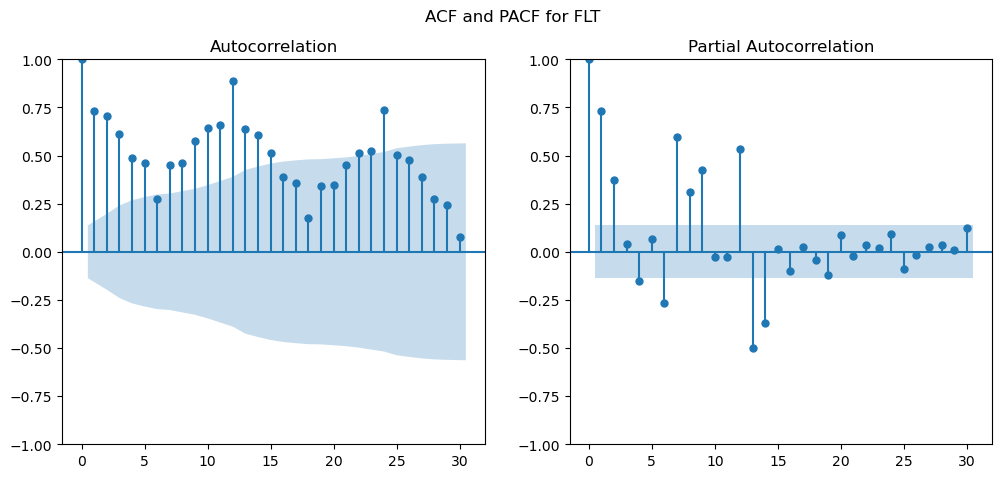

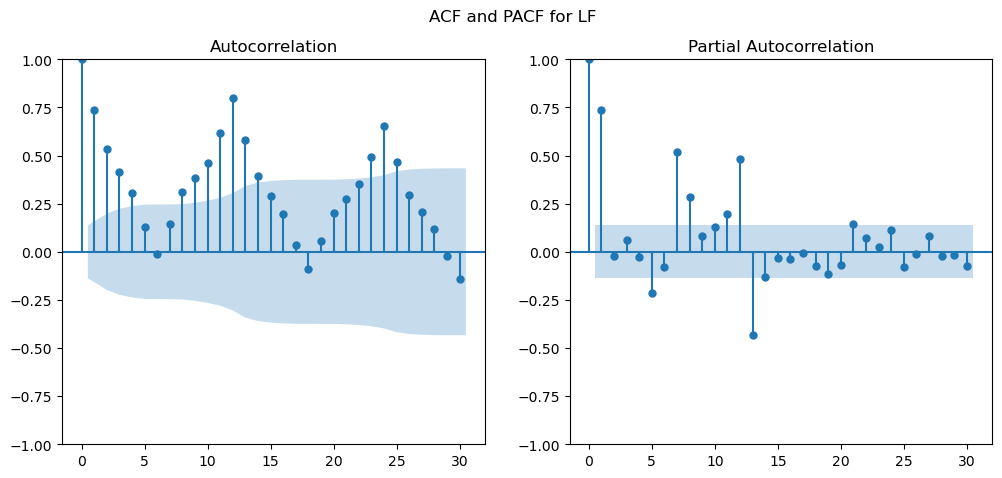

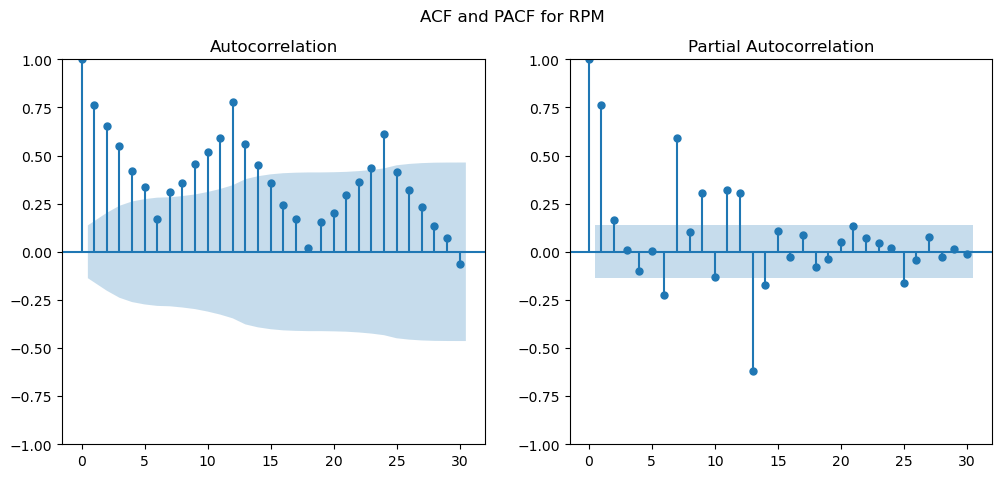

In [4]:
# Function to plot ACF and PACF
def plot_acf_pacf(target):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sm.graphics.tsa.plot_acf(train_data[target], lags=30, ax=axes[0])
    sm.graphics.tsa.plot_pacf(train_data[target], lags=30, ax=axes[1])
    plt.suptitle(f"ACF and PACF for {target.upper()}")
    plt.show()

# Generate ACF/PACF plots for all target variables
for target in targets:
    plot_acf_pacf(target)


=== Running SARIMAX for PAX ===
Optimal Order: (2, 0, 0), Seasonal Order: (2, 1, 1, 12)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 0.0337, RMSE: 0.0342


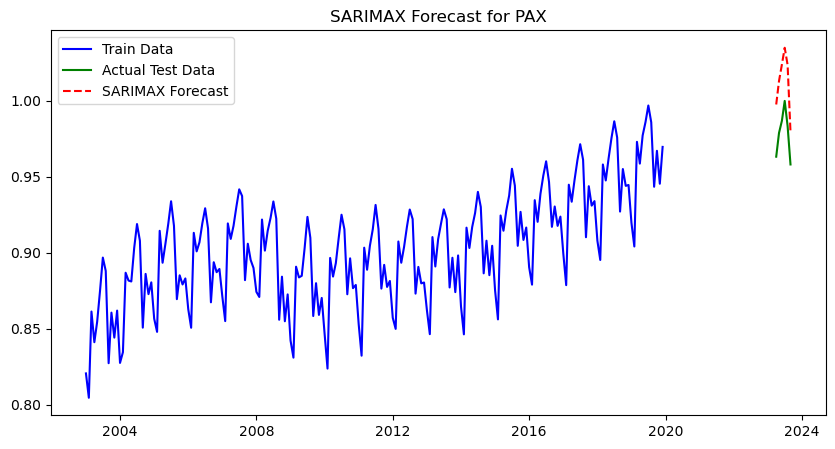


=== Running SARIMAX for FLT ===
Optimal Order: (1, 0, 1), Seasonal Order: (0, 1, 1, 12)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 0.0921, RMSE: 0.0927


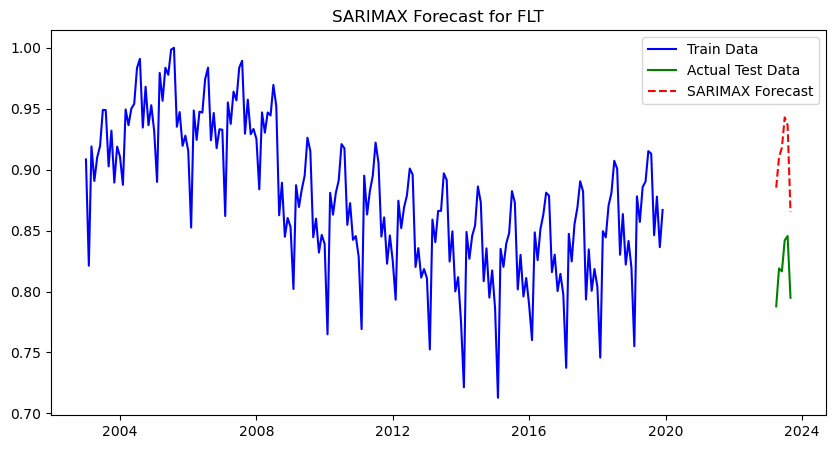


=== Running SARIMAX for LF ===
Optimal Order: (1, 1, 1), Seasonal Order: (1, 0, 2, 12)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 0.0252, RMSE: 0.0311


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


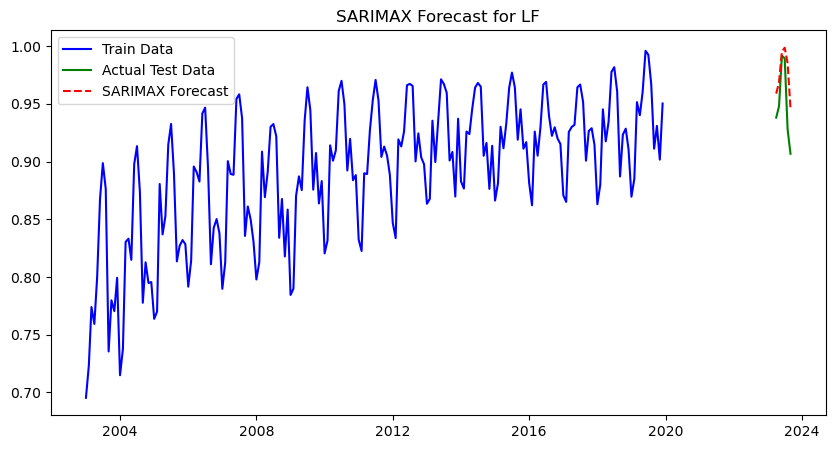


=== Running SARIMAX for RPM ===
Optimal Order: (1, 0, 1), Seasonal Order: (0, 1, 2, 12)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 0.0425, RMSE: 0.0428


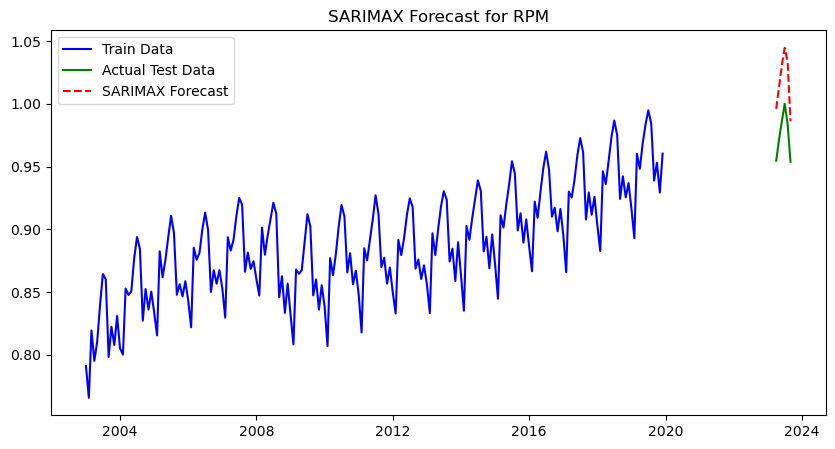


Model Summary for PAX:
                                      SARIMAX Results                                       
Dep. Variable:                                  pax   No. Observations:                  204
Model:             SARIMAX(2, 0, 0)x(2, 1, [1], 12)   Log Likelihood                 628.896
Date:                              Mon, 10 Mar 2025   AIC                          -1245.792
Time:                                      20:16:10   BIC                          -1227.120
Sample:                                  01-01-2003   HQIC                         -1238.213
                                       - 12-01-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5327      0.067      7.926      0.000       0.401       0

In [5]:
# Dictionary to store results
results = {}

# Fit SARIMAX for each target variable
for target in targets:
    print(f"\n=== Running SARIMAX for {target.upper()} ===")

    # Find optimal order using auto_arima
    auto_model = auto_arima(train_data[target], seasonal=True, m=12, stepwise=True, suppress_warnings=True)
    order = auto_model.order
    seasonal_order = auto_model.seasonal_order
    print(f"Optimal Order: {order}, Seasonal Order: {seasonal_order}")

    # Fit SARIMAX model
    model = sm.tsa.SARIMAX(train_data[target], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    sarimax_result = model.fit(disp=False)

    # Forecast
    forecast = sarimax_result.predict(start=test_data.index[0], end=test_data.index[-1])

    # Evaluate performance
    mae = mean_absolute_error(test_data[target], forecast)
    rmse = np.sqrt(mean_squared_error(test_data[target], forecast))

    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

    # Store results
    results[target] = {"model": sarimax_result, "forecast": forecast, "mae": mae, "rmse": rmse}

    # Plot actual vs predicted
    plt.figure(figsize=(10, 5))
    plt.plot(train_data[target], label="Train Data", color="blue")
    plt.plot(test_data[target], label="Actual Test Data", color="green")
    plt.plot(forecast, label="SARIMAX Forecast", color="red", linestyle="dashed")
    plt.title(f"SARIMAX Forecast for {target.upper()}")
    plt.legend()
    plt.show()

# Print final model results summary
for target in targets:
    print(f"\nModel Summary for {target.upper()}:")
    print(results[target]["model"].summary())

In [6]:
import pandas as pd

# Create a dataframe to store evaluation results
eval_results = pd.DataFrame(columns=["Model", "AIC", "MAE", "RMSE"])

# Populate the dataframe with results
for target in targets:
    model_order = results[target]["model"].model.order  # (p,d,q)
    seasonal_order = results[target]["model"].model.seasonal_order  # (P,D,Q,m)
    aic = results[target]["model"].aic
    mae = results[target]["mae"]
    rmse = results[target]["rmse"]
    
    # Format the SARIMAX model representation
    model_repr = f"SARIMA{model_order}x{seasonal_order}"
    
    # Store results in the dataframe
    eval_results.loc[target] = [model_repr, round(aic, 3), round(mae, 6), round(rmse, 6)]

# Print the formatted table
print("\nSARIMAX Model Summary (Hyperparameters, AIC, MAE, RMSE):\n")
print(eval_results)



SARIMAX Model Summary (Hyperparameters, AIC, MAE, RMSE):

                             Model       AIC       MAE      RMSE
pax  SARIMA(2, 0, 0)x(2, 1, 1, 12) -1245.792  0.033723  0.034235
flt  SARIMA(1, 0, 1)x(0, 1, 1, 12) -1127.411  0.092066  0.092670
lf   SARIMA(1, 1, 1)x(1, 0, 2, 12)  -998.942  0.025164  0.031080
rpm  SARIMA(1, 0, 1)x(0, 1, 2, 12) -1287.881  0.042474  0.042805
